In [6]:
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/MOCK_DATA1.csv')
df.head()

id Month  Year  Units  Amount
0   1   APR  2022    333    3330
1   2   MAR  2022    944    9440
2   3   NOV  2022   1024   10240
3   4   MAY  2022    388    3880
4   5  JULY  2022    111    1110

In [4]:
units = np.array(df['Units'])
units

array([ 333,  944, 1024,  388,  111,  998,  172,  811,  755,  568,  903,
        273,  966,  711,  504,  783,  392,  554,  742, 1030,  885,  355,
        807,  688, 1037,   57,  448,  719,  779,   30,   14,  952,  103,
        506,  983,  866,  882,  854, 1012, 1005,  877,  463,  265,  778,
        385, 1178,  783,  195,  787,  713,   20,  997,  380,  618,  799,
        969, 1025,   67,  520,  620,  653,  840,  605,  788,  927,  124,
         92,   96,  693,  692,  388,   99,  844,  725,  199,  436,  712,
        832, 1190,  654,  795,  314,  171,  224,  271,  855,  733,  989,
        839,  993,  764, 1044,  519, 1193, 1087,  308,  572,  410,  604,
        755, 1197,  844,  354,  377,  840,  510,  515,  189,  826,  286,
        435,  584,  546,  711, 1073,  257,  831,   31,   26,  317,   27,
         57,    7,  684,  920,  604,  723,  126,  766,  656, 1123,  981,
       1012, 1146,  199,  474,  533,   15,  492, 1048,  676,   48,  646,
       1142,  673,  107,  833, 1046,  733,  431, 11

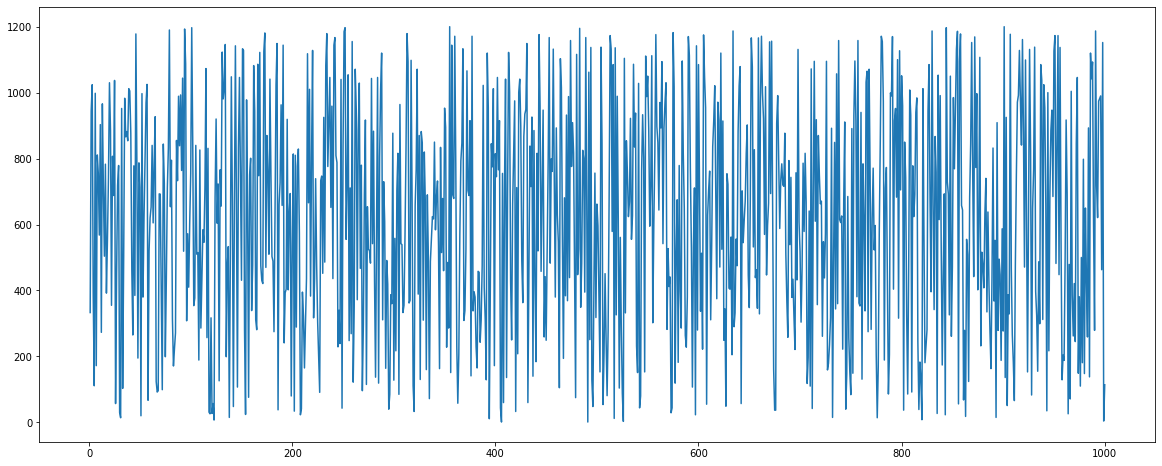

In [9]:
x = [i+1 for i in range(len(units))]
plt.figure(figsize=(20, 8))
plt.plot(x, units)

In [ ]:
# def increment_datetime(dt, num_iterations, delta_months=1):
#   arr = []
#   for i in range(num_iterations):
#       dt += datetime.timedelta(days=delta_days)
#       arr.append(dt)
#   return arr

def increment_datetime(dt, num_iterations, delta_months=1):
    arr = []
    for i in range(num_iterations):
        new_year = dt.year
        new_month = dt.month + delta_months
        while new_month > 12:
            new_year += 1
            new_month -= 12
        new_day = min(dt.day, calendar.monthrange(new_year, new_month)[1])
        new_dt = dt.replace(year=new_year, month=new_month, day=new_day)
        arr.append(new_dt)
        dt = new_dt
    return arr

def genPred(num, dt=datetime.datetime(2006, 12, 16, 17, 24)):
  arr = increment_datetime(dt, num)

  return arr

In [ ]:
a = genPred(2)
a

[datetime.datetime(2007, 1, 16, 17, 24),
 datetime.datetime(2007, 2, 16, 17, 24)]

In [ ]:
num = len(units)
arr = genPred(num, datetime.datetime(2006, 12, 1, 12, 1))
df_pred = pd.DataFrame({
    'dt': arr,
    'Global_active_power': units
})

# df_pred.set_index('dt', inplace=True)
df_pred.head()

dt  Global_active_power
0 2007-01-01 12:01:00                  333
1 2007-02-01 12:01:00                  944
2 2007-03-01 12:01:00                 1024
3 2007-04-01 12:01:00                  388
4 2007-05-01 12:01:00                  111

In [ ]:
df = df_pred

In [ ]:
df['Global_active_power'] = df['Global_active_power'].astype('float64')

In [ ]:
df_daily = df.resample('M').mean()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_daily.index, df_daily['Global_active_power'], test_size=0.2, shuffle=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train, order=(1, 1, 1))

In [ ]:
results = model.fit()

In [ ]:
# Change steps
forecast = results.forecast(steps=30)
a = np.array(forecast)
a

array([633.54837002, 620.0174208 , 619.57883924, 619.5646234 ,
       619.56416262, 619.56414768, 619.5641472 , 619.56414719,
       619.56414718, 619.56414718, 619.56414718, 619.56414718,
       619.56414718, 619.56414718, 619.56414718, 619.56414718,
       619.56414718, 619.56414718, 619.56414718, 619.56414718,
       619.56414718, 619.56414718, 619.56414718, 619.56414718,
       619.56414718, 619.56414718, 619.56414718, 619.56414718,
       619.56414718, 619.56414718])

# New Pred

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
path = '/content/drive/MyDrive/AjinkyaData/household_power_consumption.txt'

In [83]:
df = pd.read_csv(path, sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [84]:
df = df.drop(['Global_reactive_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'], axis=1)
df.head()

Global_active_power
dt                                      
2006-12-16 17:24:00                4.216
2006-12-16 17:25:00                5.360
2006-12-16 17:26:00                5.374
2006-12-16 17:27:00                5.388
2006-12-16 17:28:00                3.666

In [85]:
df_daily = df.resample('D').mean()
df_daily.head()

Global_active_power
dt                             
2006-12-16             3.053475
2006-12-17             2.354486
2006-12-18             1.530435
2006-12-19             1.157079
2006-12-20             1.545658

In [86]:
df_daily.describe()

Global_active_power
count          1433.000000
mean              1.092048
std               0.420415
min               0.173818
25%               0.816776
50%               1.080732
75%               1.323926
max               3.314851

In [89]:
df = df_daily

In [90]:
dt = df.index.values
def preprocess(arr):
  new_arr = []
  for elem in arr:
    a = int(str(elem).split('T')[0].replace('-', ''))
    new_arr.append(a)
  
  return np.array(new_arr)

dt = preprocess(dt)
dt

array([20061216, 20061217, 20061218, ..., 20101124, 20101125, 20101126])

In [91]:
from sklearn.model_selection import train_test_split

df = df_daily
# split dataset into training and testing sets
df.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(dt.reshape(-1,1),
                                                    df['Global_active_power'].values, 
                                                    test_size=0.2, random_state=42,
                                                    shuffle=False)
len(X_train), len(X_test), len(y_train), len(y_test)

(1146, 287, 1146, 287)

In [92]:
from sklearn.linear_model import LinearRegression

# create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [96]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)

# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                   SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [98]:
reg_pred = reg.predict(X_test)
reg_pred

array([1.08436287, 1.08436133, 1.08435979, 1.08435824, 1.0843567 ,
       1.08435515, 1.08435361, 1.08435207, 1.08435052, 1.08434898,
       1.08434743, 1.08434589, 1.08434435, 1.0843428 , 1.08434126,
       1.08433972, 1.08433817, 1.08433663, 1.08433508, 1.08433354,
       1.084332  , 1.08433045, 1.08421775, 1.0842162 , 1.08421466,
       1.08421311, 1.08421157, 1.08421003, 1.08420848, 1.08420694,
       1.08420539, 1.08420385, 1.08420231, 1.08420076, 1.08419922,
       1.08419767, 1.08419613, 1.08419459, 1.08419304, 1.0841915 ,
       1.08418995, 1.08418841, 1.08418687, 1.08418532, 1.08418378,
       1.08418223, 1.08418069, 1.08417915, 1.0841776 , 1.08417606,
       1.08417452, 1.08417297, 1.08417143, 1.08406335, 1.08406181,
       1.08406026, 1.08405872, 1.08405718, 1.08405563, 1.08405409,
       1.08405255, 1.084051  , 1.08404946, 1.08404791, 1.08404637,
       1.08404483, 1.08404328, 1.08404174, 1.08404019, 1.08403865,
       1.08403711, 1.08403556, 1.08403402, 1.08403247, 1.08403

In [93]:
# make predictions on the testing set
y_pred = model.predict(X_test)
y_pred

array([1.07831463, 1.07831285, 1.07831107, 1.07830929, 1.0783075 ,
       1.07830572, 1.07830394, 1.07830216, 1.07830037, 1.07829859,
       1.07829681, 1.07829503, 1.07829324, 1.07829146, 1.07828968,
       1.07828789, 1.07828611, 1.07828433, 1.07828255, 1.07828076,
       1.07827898, 1.0782772 , 1.07814707, 1.07814528, 1.0781435 ,
       1.07814172, 1.07813994, 1.07813815, 1.07813637, 1.07813459,
       1.07813281, 1.07813102, 1.07812924, 1.07812746, 1.07812567,
       1.07812389, 1.07812211, 1.07812033, 1.07811854, 1.07811676,
       1.07811498, 1.0781132 , 1.07811141, 1.07810963, 1.07810785,
       1.07810607, 1.07810428, 1.0781025 , 1.07810072, 1.07809894,
       1.07809715, 1.07809537, 1.07809359, 1.0779688 , 1.07796702,
       1.07796524, 1.07796346, 1.07796167, 1.07795989, 1.07795811,
       1.07795632, 1.07795454, 1.07795276, 1.07795098, 1.07794919,
       1.07794741, 1.07794563, 1.07794385, 1.07794206, 1.07794028,
       1.0779385 , 1.07793672, 1.07793493, 1.07793315, 1.07793

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate mean squared error and coefficient of determination
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Coefficient of Determination:', r2)

Mean Squared Error: 0.10335160875336401
Coefficient of Determination: -0.045352238098179454


In [100]:
def plotCurves(x, yt, yp):
  plt.plot(x, yt)
  plt.plot(x, yp)

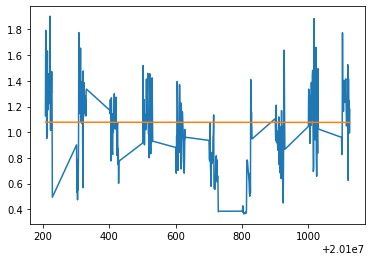

In [95]:
plotCurves(X_test, y_test, y_pred)

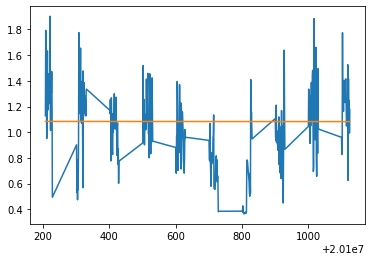

In [99]:
plotCurves(X_test, y_test, reg_pred)

In [62]:
def increment_datetime(dt, num_iterations, delta_days=1):
  arr = []
  for i in range(num_iterations):
      dt += datetime.timedelta(days=delta_days)
      arr.append(dt)
  return arr

In [63]:
start_date = datetime.datetime(2022, 1, 1)
num_days = 5
incremented_dates = increment_datetime(start_date, num_days, delta_days=1)
incremented_dates

[datetime.datetime(2022, 1, 2, 0, 0),
 datetime.datetime(2022, 1, 3, 0, 0),
 datetime.datetime(2022, 1, 4, 0, 0),
 datetime.datetime(2022, 1, 5, 0, 0),
 datetime.datetime(2022, 1, 6, 0, 0)]

In [66]:
incremented_dates[0].strftime('%Y-%m-%d')

'2022-01-02'

In [70]:
def preprocess_for_infer(inp):
  res = []
  for elem in inp:
    a = int(str(elem.strftime('%Y-%m-%d').replace('-', '')))
    res.append(a)
  
  return np.array(res)

In [73]:
inputX = preprocess_for_infer(incremented_dates)
inputX

array([20220102, 20220103, 20220104, 20220105, 20220106])

In [76]:
def inferPipeline(inputX):
  y_pred = model.predict(inputX.reshape(-1, 1))

  return y_pred

In [77]:
y_preds = inferPipeline(inputX)
y_preds

array([0.86458563, 0.86458385, 0.86458207, 0.86458029, 0.8645785 ])

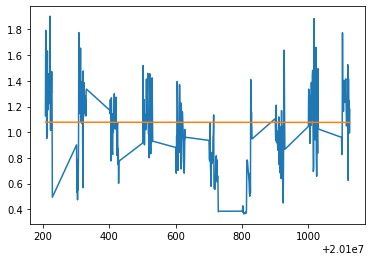

In [82]:
plotCurves(X_test, y_test, y_pred)

In [101]:
def inferPipelineReg(inputX):
  y_pred = reg.predict(inputX.reshape(-1, 1))

  return y_pred

In [109]:
# Set the initial date and from their number of days to be considered
start_date = datetime.datetime(2025, 1, 1)
num_days = 300

incremented_dates = increment_datetime(start_date, num_days, delta_days=1)
inputX = preprocess_for_infer(incremented_dates)
y_pred = inferPipelineReg(inputX)

df_predictor = pd.DataFrame({
    'dt': incremented_dates,
    'Global_active_power': y_pred
})
df_predictor.set_index('dt', inplace=True)
df_predictor.head()

Global_active_power
dt                             
2025-01-02             0.852936
2025-01-03             0.852935
2025-01-04             0.852933
2025-01-05             0.852932
2025-01-06             0.852930

In [ ]:
df_predictor